# INFO 2950 Homework 7

---

## Discussion Question

The idea of using personal data and simulations to predict (and potentially manipulate) voter behaviour did not start with [Cambridge Analytica](https://en.wikipedia.org/wiki/Cambridge_Analytica); it has been going on for longer than you might think!

In 1960, John F. Kennedy's campaign employed a company called "Simulmatics" to consult on Kennedy's platform points using data prediction models, including his position on civil rights. This action was part of a larger endeavour called "Project Macroscope" led by Ed Greenfield, an advertiser.

_"With Project Macroscope, Greenfield proposed to build an 'information bank' out of election returns and public opinion surveys. They'd sort voters into voter types, down to a microscopic level, classifying for instance, 'working-class Negroes in northern cities.' For each voter type, information from the election returns and the public opinion surveys would be sorted by issue. \[...\] The machine, crammed with microscopic data about voters and issues, would act as a 'macroscope": you could ask it any question about the kind of move a candidate might make, and it would be able to tell you how voters, down to the tiniest segment of the electorate, would respond._

\[...\]

_After settling into Simulmatics’ new offices, Greenfield sent a proposal for Project Macroscope to Newton Minow, a partner at Stevenson’s Chicago law firm who had served as Stevenson’s counsel. Minow forwarded the proposal to Arthur Schlesinger, Jr., in Cambridge, where he lived two doors down from Ithiel de Sola Pool. 'Without prejudicing your judgment, my own opinion is that such a thing (a) cannot work, (b) is immoral, (c) should be declared illegal,' Minow wrote. 'Please advise.' Schlesinger looked over the proposal. 'I have pretty much your feelings about Project Macroscope,' he wrote back. 'I shudder at the implication for public leadership of the notion . . . that a man shouldn’t say something until it is cleared with the machine.' But he wasn’t going to thwart it. 'I do believe in science and don’t like to be a party to choking off new ideas.' Project Macroscope went ahead. It’s going on still."_

(excerpt from [*If Then* by Jill Lepore](https://www.goodreads.com/book/show/50489327-if-then))

**Comment on the above passage. Do you agree with Minnow and Schlesinger's criticism about Project Macroscope? On the other hand, if the goal of democracy is to faithfully represent the views of the people via their elected officials, is there a place for voter data and simulation in modern politics? If so, how might a data scientist conduct such work ethically and responsibly?**

## **Note: No response to the discussion question is required on the homework.**

---
## Pre-section

In [2]:
## Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Regression with a Categorical Input

Linear regression can only be performed with numeric inputs, but in some cases, variables of interest are categorical (discrete). On hw6, we saw that one can directly swap out the values in a categorical column with numbers when there is a natural ordering of the categories; we encoded the `cut` column using the dictionary
```
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
```
swapping out the string categories with the integers from 1 to 5, where `1` represented the worst cut category and `5` represented the best.

If the categories are not ordered, or we want to look at the effect of being in a specific category vs. not, we can use *indicator variables*. For example, if I wanted to understand how much more expensive an `Ideal` cut diamond was vs all other diamonds, I might create an indicator variable called `is_ideal`, where an entry of 1 indicates that the diamond had an `Ideal` cut, and an entry of 0 means that it had any other cut besides `Ideal` (i.e. "not `Ideal`").

We learned on hw6 that `pandas` will easily take a categorical column and create a set of indicator columns from it that reflect whether or not an observation is in a specified category using the `pandas.get_dummies()` function.

It's not immediately clear how to interpret a linear regression with indicator input variables. Let's try to understand this idea now by exploring a dataset generated based on wine reviews from [WineEnthusiast magazine](https://www.kaggle.com/zynicide/wine-reviews/version/4).

In [3]:
wines = pd.read_csv("wines.csv")
wines.head()

,country,points,price,value
0,Canada,92,30.0,3.066667
1,Canada,83,12.0,6.916667
2,Croatia,88,20.0,4.400000
3,Croatia,88,27.0,3.259259
4,Canada,92,32.0,2.875000


The original data were downloaded [here](https://www.kaggle.com/zynicide/wine-reviews/version/4), but only a few variables have been selected and it has been filtered down so that it only includes wines from Canada and Croatia.

The `points` column indicates the number of points WineEnthusiast magazine awarded the wine on a scale of 1-100, where 1 is the worst wine and 100 is the best (they only publish reviews for wines that score at least 80 points). The `price` column records the price of the wine in US dollars. The `value` column was generated by taking `points` and dividing by `price`, so this column is in units of points per US dollar. 

We're going to compare the wine values of the two countries.

There are two approaches we might take:
1. the "naïve" approach: compute the mean value for each country and compare 
1. the "sophisticated" appproach: linear regression with value as the outcome and the country as the predictor

Let's start with the naïve approach.

In [4]:
#Compute the mean `value` score for each country
can_mean = wines.query("country == 'Canada'").value.mean()
print("Mean of Canadian wine value: {0:.3f} pts/$".format(can_mean))

cro_mean = wines.query("country == 'Croatia'").value.mean()
print("Mean of Croatian wine value: {0:.3f} pts/$".format(cro_mean))

Mean of Canadian wine value: 3.146 pts/$
Mean of Croatian wine value: 4.118 pts/$


In [5]:
print("Croatian mean - Canadian mean: {0:.3f}".format(cro_mean-can_mean))

Croatian mean - Canadian mean: 0.972


On average, Croatian wines provide 0.972 pts/$ more value than Canadian wines. It could be that Croatian wines tend to score higher than Canadian wines, or that Croatian wines are less expensive, or a combination of both.

---

Now let's try the "sophisticated" approach. We'll run a linear regression using `country` to precict `value`. 

---

Using the `pd.get_dummies()` function we add a column to `wines` called `is_croatia` that indicates whether the country is "Croatia" or not. Notice that this encodes all the country information that we have.

In [6]:
wines['is_croatia'] = pd.get_dummies(wines['country'])['Croatia']
wines.head()

,country,points,price,value,is_croatia
0,Canada,92,30.0,3.066667,0
1,Canada,83,12.0,6.916667,0
2,Croatia,88,20.0,4.400000,1
3,Croatia,88,27.0,3.259259,1
4,Canada,92,32.0,2.875000,0


In [7]:
## Perform the regression
model = LinearRegression().fit(wines[['is_croatia']],wines['value'])
## Print regression coefficients
print("Regression slope is {slope:.3f}".format(slope = model.coef_[0]))
print("Regression intercept is {intercept:.3f}".format(intercept = model.intercept_))

Regression slope is 0.972
Regression intercept is 3.146


The intercept is the mean of the Canadian wines (when `is_croatia == 0`), and the slope is the difference of the means, so the intercept + the slope = the mean of the Croatian wines (when `is_croatia == 1`).  

This makes sense if we remember the regression equation:

$$ Y = \beta_0 + \beta_1 X. $$

In the case of this regression, $X$ is the indicator variable `is_croatia`, and $Y$ is `value`. When $X=0$ (a Canadian wine), the value is predicted as the intercept, $\beta_0$, while when $X=1$ (a Croatian wine), the value is predicted as the intercept plus the slope, $\beta_0+\beta_1$. So what the regression does is it guesses the Canadian sample mean for Canadian wines and the Croatian sample mean for Croatian wines, capturing the difference in value through the slope parameter. (The slope is just rise over run, so the rise is Croatian mean - Canadian mean, and the run is $1-0$.) 

**The "naïve" approach and the "sophisticated" approach are the same!** Don't be fooled by the fact that "linear regression" sounds fancy---it isn't necessarily. It's all about how you use it and the conclusions we draw from it.


---

# Homework

## Part 1: Simpson's Paradox

Last week, when analyzing the `diamonds` dataset on hw6, you may have noticed that the sign of a variable's regression slope may change when going from a single variable regression to a multivariable regression. This phenomenon is known as [**Simpson's paradox**](https://en.wikipedia.org/wiki/Simpson%27s_paradox). Let's explore it further now using the [`penguins` dataset](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/):

In [8]:
## load penguins data
penguins = sns.load_dataset('penguins')

Our goal will be to predict bill depth (in mm) using bill length (in mm). We will do so using linear regression, in which case we need to ensure there are no missing values in these two columns:

In [9]:
## drop observations with NaN in specified columns
pengs = penguins.dropna(subset = ['bill_length_mm', 'bill_depth_mm'])

Use this cleaned `pengs` table in the problems in part 1.

---

### Problem 1 (4 pts)

Use `sns.regplot()` to make a scatterplot with a linear regression line, where bill length is on the $x$-axis and bill depth is on the $y$-axis (tutorial [here](https://seaborn.pydata.org/tutorial/regression.html)). 

Use `sklearn` to fit a single variable linear regression with bill length as the predictor and bill depth as the outcome. Print the regression slope of the bill length variable rounded to two decimal places.

---

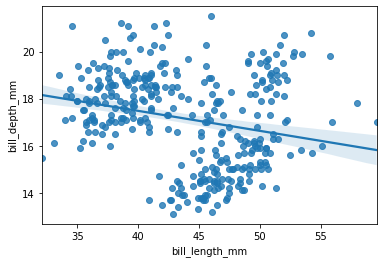

slope:  -0.09


In [10]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=pengs)
plt.show()

X = pengs['bill_length_mm']
Y = pengs['bill_depth_mm']

linear_model = LinearRegression()
x = []
nx = []
for n in X:
    nx.append(n)
    x.append(nx)
    nx = []
    
linear_model.fit(x, Y)

print('slope: ',round(linear_model.coef_[0],2))


---

### Problem 2 (4 pts)

What does this regression slope indicate about the relationship between bill length and depth? Also, specifically interpret the *value* of the slope: what does this number mean in terms of the bill length and depth measurements?

---

The regression slope indicates a very small negative correlation between bill length and depth. For each increase in mm in bill length, bill depth decreases on average by -0.09 mm. This and the pattern of the scatterplot show that bill length does not have a huge impact overall on bill depth (for all of the species combined).

---

### Problem 3 (8 pts)

(a) Use `sns.lmplot()` to make a scatterplot with bill length on the $x$-axis, bill depth on the $y$-axis, data colored by  species and a different linear regression line for each species (tutorial [here](https://seaborn.pydata.org/tutorial/regression.html)). 

(b) Create indicator variables for each species.

(c) Use `sklearn` to fit a multivariable linear regression with bill length and each of the species indicator variables as predictors and bill depth as the outcome. Print the regression coefficient of the bill length variable rounded to two decimal places.

What does this regression slope indicate about the *species-specific* relationship between bill length and depth?

---

bill length coefficient: 0.2


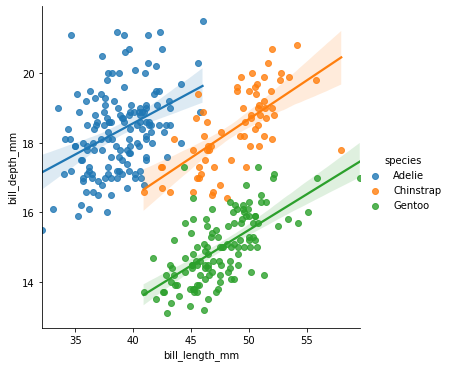

In [11]:
# scatterplot
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=pengs, hue ='species');

# indicator variables
pengs = pengs.copy()
pengs['is_adelie'] = pd.get_dummies(pengs['species'])['Adelie']
pengs['is_chinstrap'] = pd.get_dummies(pengs['species'])['Chinstrap']
pengs['is_gentoo'] = pd.get_dummies(pengs['species'])['Gentoo']
pengs.head()

# mutlivariable linear regression

multi_model = LinearRegression()
multi_model.fit(pengs[['bill_length_mm','is_adelie', 'is_chinstrap', 'is_gentoo',]], pengs['bill_depth_mm'])

print('bill length coefficient:', round(multi_model.coef_[0],2))

This regression slope that is species specific indicates that, taking species into account, the relationship between bill length and bill depth is actually slightly positive with a stronger correlation.

---

### Problem 4 (4 pts)

Explain why the regression slope of the bill length variable changed signs when we went from the single variable regression over bill length to the multivariable model with species information? Which model do you think better explains the relationship between bill length and bill depth (justify your answer)?

---

I think that the multi variable regression model better explains the relationship between bill length and bill depth because the different species cluster around different areas on the scatterplot (have different ratios of bill depth to bill length on average). For example, Gentoo has a lower depth to length ratio than the other two species, so in our normal single variable regression, this made the regression slope downsloping and negative. When we divide them by species, the regression slope looks at the individual clusters of species and determines the relationships in each closer. This makes the single variable linear regression for the data not a good indicator of what is actually occuring with the relationship between bill length and bill depth.

---

### Problem 5 (4 pts)

Print the other regression coefficients from the multivariable model stored in the `.coef_` array (exclude the bill length coefficient). What do these other coefficients represent?

---

In [12]:
# Ask in Office Hours
print('adelie coefficient:', round(multi_model.coef_[1],2))
print('chinstrap coefficient:', round(multi_model.coef_[2],2))
print('gentoo coefficient:', round(multi_model.coef_[3],2))

adelie coefficient: 2.35
chinstrap coefficient: 0.41
gentoo coefficient: -2.76


These coefficients indicate that for every increase (0-1) to each of these indicator variables, thes expected change in bill depth will be that amount. Therefore, these coefficents indicate our intercepts for each of these variables.

---

# Part 2: Logistic Regression and Bootstrap Resampling

Logistic regression is a form of linear regression used to model a *binary outcome*. Let's try to predict penguin sex using body mass. First, let's drop all rows from the original data that have a NaN in the body mass and/or sex columns:

In [13]:
## drop observations with NaN in specified columns
pengs2 = penguins.dropna(subset = ['body_mass_g', 'sex'])

Use this cleaned `pengs2` table in the problems in part 2.

---

### Problem 6 (4 pts)

Split the data into a training and test set using the `train_test_split()` function. *Note: The `train_test_split()` function has already been imported from `sklearn` above and can be used without a prefix.* Set the test set size to 20% and make sure the `random_state` parameter is set to 15, so everyone gets the same "random" split. 

Print the first few lines of the training and test sets, with a print statement before each table to label which is which.

---

In [14]:
body_mass = pengs2["body_mass_g"]
sex = pengs2["sex"]
X_train, X_test, y_train, y_test = train_test_split(body_mass, sex, test_size=0.2, random_state = 15)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print('X_train:\n', X_train.head())
print('X_test:\n', X_test.head())

print('y_train:\n', y_train.head())
print('y_test:\n', y_test.head())

X_train:
 318    4625.0
224    5400.0
132    3500.0
86     3800.0
106    3750.0
Name: body_mass_g, dtype: float64
X_test:
 85     3550.0
130    3325.0
92     3400.0
195    3500.0
105    3550.0
Name: body_mass_g, dtype: float64
y_train:
 318    Female
224      Male
132    Female
86       Male
106    Female
Name: sex, dtype: object
y_test:
 85       Male
130    Female
92     Female
195    Female
105      Male
Name: sex, dtype: object


---

### Problem 7 (4 pts)

Fit a logistic regression model with sex as the outcome and body mass as the predictor. Print the regression coefficient **rounded to 3 significant digits**.

---

In [15]:
xtrain = []
nx = []
for n in X_train:
    nx.append(n)
    xtrain.append(nx)
    nx = []

pengs_model = LogisticRegression().fit(xtrain, y_train)
print(np.around(pengs_model.coef_[0, 0],7))

5.32e-05


---

### Problem 8 (4 pts)

Use the model to predict the sex of penguins in the test set. Report the prediction accuracy (number of correct predictions divided by the total number of predictions) as a percentage rounded to one decimal place. 

---

In [16]:
xtest = []
nx = []
for n in X_test:
    nx.append(n)
    xtest.append(nx)
    nx = []
    
predicted = pengs_model.predict(xtest)
correct = y_test.to_numpy()

count = 0
for x in range(len(correct)):
    if(correct[x]==predicted[x]):
        count = count +1
print('prediction accuracy testing set: ',round(count/len(correct)*100,1),'%')

prediction accuracy testing set:  46.3 %


---

### Problem 9 (4 pts)

Repeat the previous exercise for the training set.

---

In [17]:
xtrain = []
nx = []
for n in X_train:
    nx.append(n)
    xtrain.append(nx)
    nx = []
    
predicted = pengs_model.predict(xtrain)
correct = y_train.to_numpy()

count = 0
for x in range(len(correct)):
    if(correct[x]==predicted[x]):
        count = count +1
print('prediction accuracy training set: ',round(count/len(correct)*100,1),'%')

prediction accuracy training set:  51.5 %


---

### Problem 10 (4 pts)

Based on the above prediction accuracies, do you think this is a good model for predicting penguin sex (justify your answer)? How might you improve this model with the data to which you already have access?

---

I do not think this is a good model (the test set is less accurate than the training set an they are both not very accurate) because we're just using the body mass as predictor, we could include other variables as predicotrs like bill length or depth or species. Based on what we have seen, species would likely be a good indicator 

---

### Problem 11 (6 pts)
**You must work alone on this problem. You may not seek help in study hall or on Ed except to clarify the problem.**

Using the bootstrap resampling method, generate a 99% confidence interval for the mean of the absolute difference of two standard normal variables. Start by generating a sample of 30 data points from this distribution and resampling a large number of times.

Approximate the true mean of the distribution correct to 2 decimal places. Does your bootstrapped confidence interval contain the true mean?

---

In [22]:
x = np.random.rand(10000)
y = np.random.rand(10000)
diff = np.abs(x-y)

diff30 = np.random.choice(diff, 30)
# print(diff30)
# The original source for the modified code is here: https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d
def bootstrap(data,mean,n):
    bs = np.zeros(n)
    
    for i in range(n):
        bs_sample = np.random.choice(data,size=len(data))
        bs[i] = mean(bs_sample)
    
    return bs

bs_diff = bootstrap(diff30,np.mean,30)

# true mean
print("true mean: " , round(np.mean(diff),2))

# bootstrap mean
print("bootstrap mean: " , np.mean(bs_diff))


# confidence interval
conf_interval = np.percentile(bs_diff,[0.5,99.5])

# Print the interval
print("confidence interval: ",conf_interval)

true mean:  0.33
bootstrap mean:  0.29038642412458865
confidence interval:  [0.21632179 0.36217028]


My bootstrapped confidence interval does contain the true mean.